# Task 1B: Fruit classification with a CNN

This notebook will serve as implementation of the API that you have created in your "Code" folder. You will write functions in the "py" files and use them here.

We will be using "Fruits" dataset present in PyTorch and train a convolutional neural network (CNN) to classify digits.


## What is expected from this notebook?

This notebook should be used to present your work. You should explain wherever necessary (but also not too much) about what you did and why you did it. You should explain things like hyper parameter settings (even if it was provided before hand to you by us), training performance and testing performance of the model. You should reason why your model is working fine and not overfitting.

Since numbers don't are an argot, you should also use visualizations wherever possible. You can visualize things like **loss curve**, show **confusion matrix** and since this is a CNN you can also consider **advance techniques like gradcam**, etc. 

You can also use techniques that allow for faster training, assuage problems involving vanishing and exploding gradients. 

Finally, you can show some manual verifications by displaying and making predictions on random test examples. 

## Absolutely required items?

1. First of all, import the libraries and the dataset. Divide the dataset into test and train.
2. Next, show dataset samples and distribution of different type of data. For example, in case of "Fruits Dataset" you can show some random images and their labels. Also, show distribution of each class of images.
3. Next, perform required transformations (also **data augmentation**) on "Fruits dataset" (normalization, resizing, grayscaling, if required, etc.) using torchvision transforms.
4. Create required dataloaders with PyTorch and use the module dataset we created to load data in mini-batches.
5. Train the model, show loss and accuracy at each step of operation.
6. Plot the **loss curve for both train and validation phase**.
7. Pick some manual random images (probably 7-10) from test dataset and predict their values showing **expected and actual result**. 

**NOTE: ** 
1. You may or may not choose to delete these instruction cells after completion of the notebook.
2. Keep the outputs of the cells.

In [1]:
from utils.dataset import create_and_load_meta_csv_df,ImageDataset
from utils import dataset
from model import FNet
from torchvision import transforms
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
# import other required libraries here
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [2]:
# loading dataframes using dataset module 
df, df_train, df_test = create_and_load_meta_csv_df(dataset_path='../Data/fruits/', destination_path='../Data/dataset', randomize=True, split=0.8)

C:\Users\prata\Desktop\Team id #145\task1#hc\Task 1\Task 1B\Data\fruits
['Apple', 'Banana', 'Orange', 'Pineapple', 'Strawberry']
[0 1 2 3 4]


In [3]:
# using dataframes, pytorch and torchvision to transform data. Also, use dataloaders for batching, shuffling, etc.  
data_transforms = {
    'train': transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]),
        # add transforms here
    
    'val': transforms.Compose([
        # add transforms here
        transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    }


image_datasets = {'train': dataset.ImageDataset(df_train, transform=data_transforms['train']), 
                  'val': dataset.ImageDataset(df_test, transform=data_transforms['val'])}

#dataloaders = # make data loaders
train_data=DataLoader(image_datasets['train'],batch_size=30,shuffle=True)
test_data=DataLoader(image_datasets['val'],batch_size=30,shuffle=True)

In [4]:
import matplotlib.pyplot as plt
plt.imshow(image_datasets['train'][100][0][1])


In [5]:
for i,batch in enumerate(train_data,0):
    image,labels,idx=batch
    
    break   
    

In [6]:
# do rest of the things as mentioned in the above points

['Banana', 1] tensor(1)


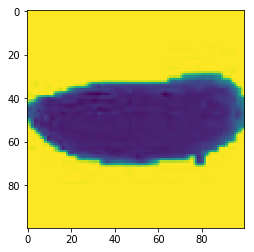

In [7]:
plt.imshow(image[0][2])
"""
    I have created a extra column as categorical encoding of the actual labels , labels are string data so have  assigned a  integers accordingly
"""
print(labels[0],idx[0]) 

In [8]:
len(image)# batch size

30

In [9]:
net=FNet()
net.to(device)

FNet(
  (layer1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout2d(p=0.5)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(20, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout2d(p=0.5)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=14520, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=175, bias=True)
  (fc3): Linear(in_features=175, out_features=5, bias=True)
)

In [10]:
print("The nn Shape :\n================================================================\n")
print(net)


The nn Shape :

FNet(
  (layer1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout2d(p=0.5)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(20, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout2d(p=0.5)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=14520, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=175, bias=True)
  (fc3): Linear(in_features=175, out_features=5, bias=True)
)


In [11]:
for parameter in net.parameters():
    print(str(parameter.data.numpy().shape)+'\n') #the parameters 

(20, 3, 5, 5)

(20,)

(20,)

(20,)

(30, 20, 5, 5)

(30,)

(30,)

(30,)

(300, 14520)

(300,)

(175, 300)

(175,)

(5, 175)

(5,)



In [12]:
costFunction=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=.001,momentum=.9)

In [13]:
def train_model(epochs):
    net.train().to(device)
    for epoch in range(epochs):
        losses=[]
        closs=0
        for i,(image,label,idx) in enumerate(train_data,0):
            pred=net(image)
            loss=costFunction(pred,idx)
            closs+=loss.item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            losses.append(loss.item())
            if i%10==0:
                print('[%d %d] loss: %.4f'%(epoch+1,i,closs/100))
                closs=0
        accuracy()
        plt.plot(losses,label='epoch'+str(epoch+1))
        plt.legend(loc=1,mode='expanded')
    plt.title("trainning loss")    
    plt.show()
    
def accuracy():
    net.eval().to(device)
    correcthit=0
    total=0
    accuracy=0
    i=0
    for batches in test_data:
        data,label,idx=batches
        
        prediction=net(data)
        
        _,prediction=torch.max(prediction.data,1)
        total +=idx.size(0)
        correcthit +=(prediction==idx).sum().item()
        accuracy=(correcthit/total)*100
    
   
    print("accuracy = "+str(accuracy))
            
                

[1 0] loss: 0.0164
[1 10] loss: 0.1551
[1 20] loss: 0.1324
[1 30] loss: 0.1013
[1 40] loss: 0.0757
[1 50] loss: 0.0565
[1 60] loss: 0.0433
accuracy = 99.79550102249489
[2 0] loss: 0.0016
[2 10] loss: 0.0124
[2 20] loss: 0.0042
[2 30] loss: 0.0016
[2 40] loss: 0.0010
[2 50] loss: 0.0005
[2 60] loss: 0.0026
accuracy = 100.0
[3 0] loss: 0.0001
[3 10] loss: 0.0005
[3 20] loss: 0.0006
[3 30] loss: 0.0016
[3 40] loss: 0.0006
[3 50] loss: 0.0003
[3 60] loss: 0.0002
accuracy = 100.0


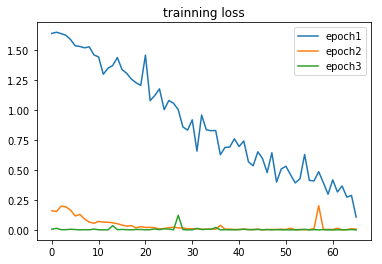

In [14]:
train_model(3)

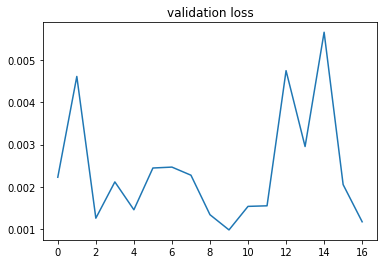

In [15]:
    net.eval().to(device)
    loss=[]
    for batches in test_data:
        data,label,idx=batches
        prediction=net(data)
        los=costFunction(prediction,idx)
        loss.append(los.item())
        
    plt.plot(loss)
         
    plt.title("validation loss")
    plt.show()
   
              

In [16]:
   
dataiter = iter(test_data)
images, labels,idx = dataiter.next()

In [17]:
prediction=net(images)
index=torch.argmax(prediction,1)#index variable coontains the predictions 

Here our model will predict the label index or categorically encoded values of the labels
==================Test===============


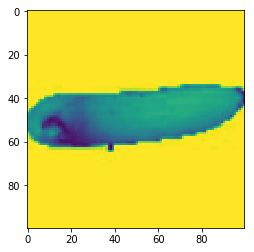

Actual :  ['Banana', 1]
Predicted :  1
==================Test===============


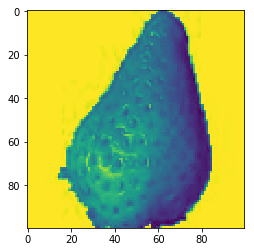

Actual :  ['Strawberry', 4]
Predicted :  4
==================Test===============


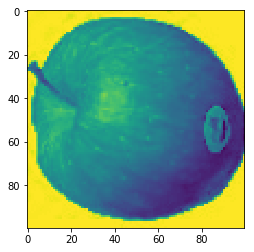

Actual :  ['Apple', 0]
Predicted :  0
==================Test===============


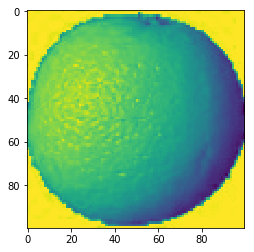

Actual :  ['Orange', 2]
Predicted :  2
==================Test===============


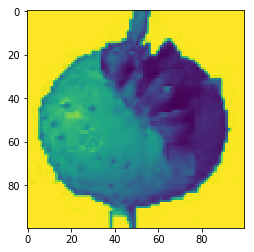

Actual :  ['Strawberry', 4]
Predicted :  4
==================Test===============


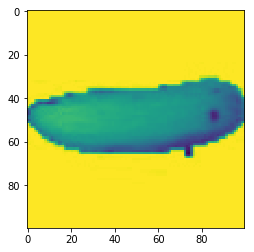

Actual :  ['Banana', 1]
Predicted :  1
==================Test===============


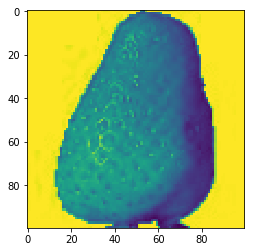

Actual :  ['Strawberry', 4]
Predicted :  4
==================Test===============


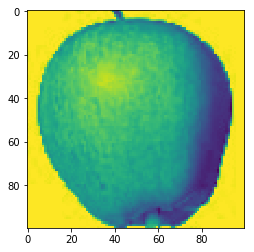

Actual :  ['Apple', 0]
Predicted :  0
==================Test===============


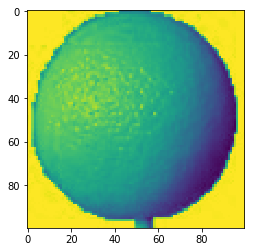

Actual :  ['Orange', 2]
Predicted :  2
==================Test===============


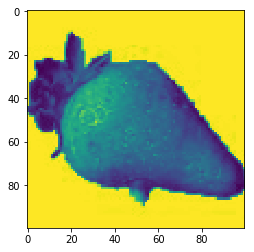

Actual :  ['Strawberry', 4]
Predicted :  4
==================Test===============


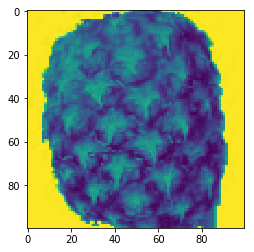

Actual :  ['Pineapple', 3]
Predicted :  3
==================Test===============


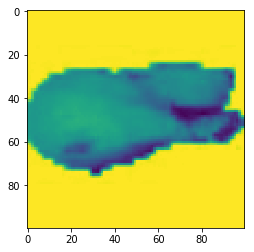

Actual :  ['Banana', 1]
Predicted :  1
==================Test===============


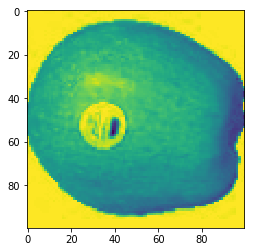

Actual :  ['Apple', 0]
Predicted :  0
==================Test===============


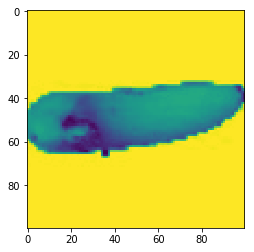

Actual :  ['Banana', 1]
Predicted :  1
==================Test===============


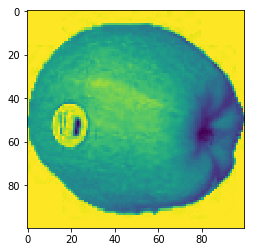

Actual :  ['Apple', 0]
Predicted :  0
==================Test===============


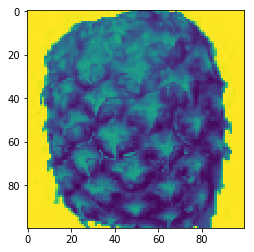

Actual :  ['Pineapple', 3]
Predicted :  3
==================Test===============


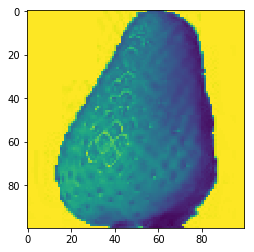

Actual :  ['Strawberry', 4]
Predicted :  4
==================Test===============


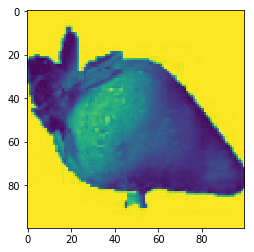

Actual :  ['Strawberry', 4]
Predicted :  4
==================Test===============


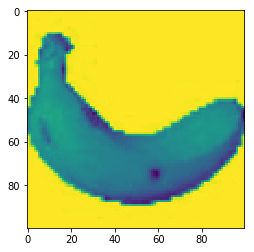

Actual :  ['Banana', 1]
Predicted :  1
==================Test===============


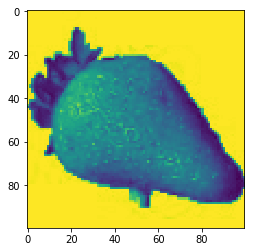

Actual :  ['Strawberry', 4]
Predicted :  4
==================Test===============


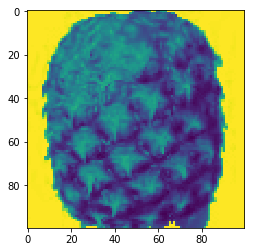

Actual :  ['Pineapple', 3]
Predicted :  3
==================Test===============


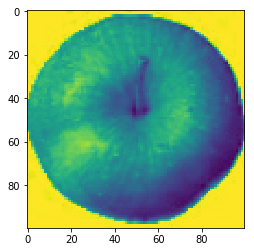

Actual :  ['Apple', 0]
Predicted :  0
==================Test===============


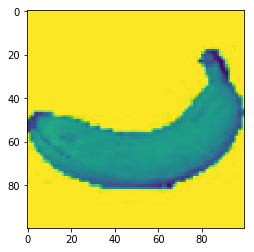

Actual :  ['Banana', 1]
Predicted :  1
==================Test===============


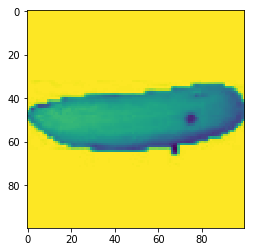

Actual :  ['Banana', 1]
Predicted :  1
==================Test===============


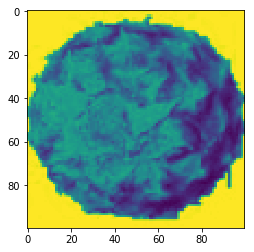

Actual :  ['Pineapple', 3]
Predicted :  3
==================Test===============


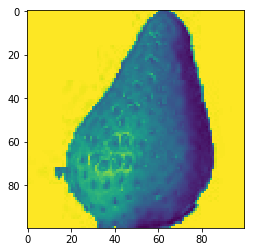

Actual :  ['Strawberry', 4]
Predicted :  4
==================Test===============


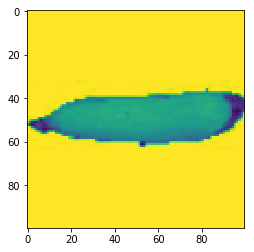

Actual :  ['Banana', 1]
Predicted :  1
==================Test===============


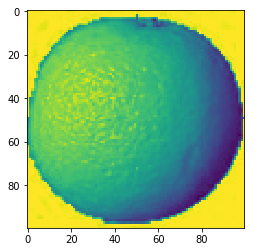

Actual :  ['Orange', 2]
Predicted :  2
==================Test===============


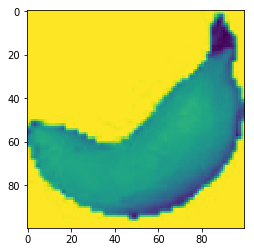

Actual :  ['Banana', 1]
Predicted :  1
==================Test===============


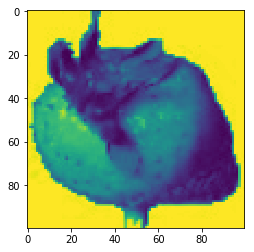

Actual :  ['Strawberry', 4]
Predicted :  4


In [18]:
print("Here our model will predict the label index or categorically encoded values of the labels")
for i in range(0,len(images)):
  

    print("==================Test===============")
    plt.imshow(images[i][0])
    plt.show()
    print("Actual : ",labels[i])
    print("Predicted : ",index[i].item())